# CMPS 392 - Machine Learning 

## *Assignment 4*

##### **Mohamed Nassar, Spring 2020**

---


## Ex 1 
### Unsupervised Learning: K-Means


In [0]:
import random as rand 
NB_PTS = 100 
x1 = [rand.random() for i in range(NB_PTS)]
x2 = [rand.random() for i in range(NB_PTS)]

clustering = [0 for i in range(NB_PTS)] 
print (x1) 
print (x2) 

K = 3
means1 = [rand.random() for i in range(K)]
means2 = [rand.random() for i in range(K)]

def avg(l): 
  return sum(l) / len(l)

[0.9471326642214772, 0.3972056462100213, 0.285162711953281, 0.18190518479532058, 0.5064335792294512, 0.09353411577070236, 0.010696628182872203, 0.8931097678552375, 0.25784095683465713, 0.5639077318959898, 0.5827542015346754, 0.9010111760867971, 0.1476923310138849, 0.8723499400325695, 0.616634424038039, 0.7242207521546677, 0.22946996173079803, 0.0930881009256731, 0.5343419877112755, 0.7685347638910641, 0.5195305278653595, 0.4884761910466756, 0.9682856385716665, 0.015981097805567224, 0.7143355260754944, 0.13458893710239128, 0.18773686359287245, 0.713016149743165, 0.9110159736798663, 0.13289237792047692, 0.6365226865007477, 0.021031828837734023, 0.6125128089797299, 0.540631915895912, 0.5066576361894304, 0.5465751532535325, 0.06269782529086254, 0.45665890532842424, 0.36664735889986466, 0.7704328708523737, 0.21740125428848178, 0.5818376040696764, 0.8427066020620296, 0.41704802121417384, 0.8429715197234855, 0.558649778400369, 0.6485213158128974, 0.983759603612089, 0.6343290410107872, 0.62465

In [0]:
# To plot the points 
 
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, output_file
from bokeh.io import output_notebook, push_notebook, show
from bokeh.layouts import row, gridplot
import math 


color_list = {0:'red',1:'blue',2:'green'}
family_list = {0:"cluster 0", 1:"cluster 1", 2: "cluster 2"}
marker_list = {0:'x', 1:'o', 2:'square'}

output_notebook()


In [0]:

plots = [] 

for it in range(1,10): 
  p = figure(tools="pan,wheel_zoom,reset,save",
          toolbar_location="above",
          title="k-Means iteration: "+str(it))
  for label in range(K): 
    source1 = ColumnDataSource(data=dict( x1=[ x1[i] for i in range(NB_PTS) if clustering[i]==label ], 
                                          x2=[ x2[i]  for i in range(NB_PTS) if clustering[i]==label ] )) 
    p.scatter(x="x1", y="x2", source=source1, size=8, color=color_list[label], marker=marker_list[label], 
              legend_label=family_list[label])
   
    source2 = ColumnDataSource(data=dict( x1= [means1[label]], 
                                            x2= [means2[label]]) )
    p.scatter(x="x1", y="x2", source=source2, size=14, color=color_list[label], marker=marker_list[label])

  p.legend.location = "top_left"
  plots.append(p)

  # (a) assign points to means 
  # WRITE YOUR CODE HERE 
  
  # (b) update means 
  # WRITE YOUR CODE HERE 

show (gridplot(plots, ncols=3) )  

# (c) can you provide an animated visualization to replace the grid of plots ? 
# (d) If the points are uniformly drawn, then it is expected that the sizes of the clusters are almost equal, 
# provide test code to verify this hypothesis

## Ex 2 
### Supervised Learning: SVM

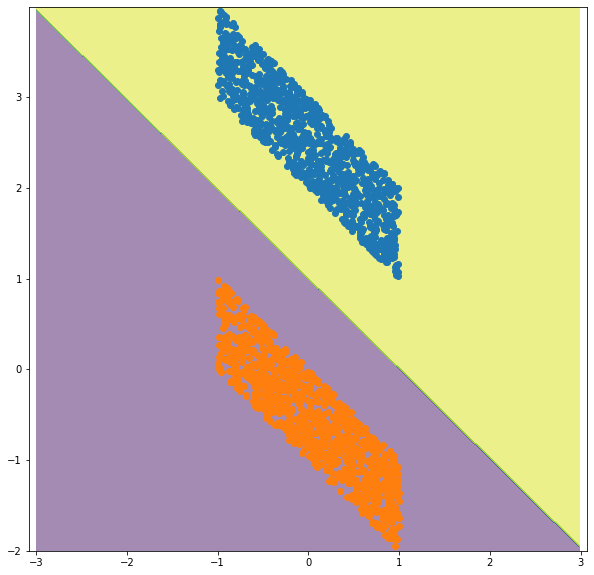

In [0]:
import random as rand 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

NB_PTS = 1000 
p1 = [rand.random() * 2 -1 for i in range(NB_PTS)]
p2 = [2 - i  + rand.random() for i in p1] 

n1 = [rand.random() * 2 -1  for i in range(NB_PTS)]
n2 = [-i - rand.random() for i in n1] 

X = list(zip(p1+n1, p2+n2))
Y = [1 for i in range(NB_PTS)] + [-1 for i in range(NB_PTS)]

# (a) what is the analytical solution for the above data using SVM with linear kernel?

clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# plot the solution 
xx, yy = np.meshgrid(np.arange(-3, 3, 0.01),
                     np.arange(-2, 4, 0.01))

C = np.c_[(xx.ravel(), yy.ravel())]
Z = clf.predict ( C )
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10,10))
ax = plt.axes() 


plt.contourf(xx, yy, Z, alpha=0.5)
ax.set_aspect('equal', 'datalim')
ax.scatter(p1, p2)
ax.scatter(n1, n2)
plt.show()

# (b) Extract the solution params form the clf object

# (c) Extract the support vectors from the clf object, can you change the plot to highlight the support vectors?

# (d) Is is possible to use gradient descent to find the optimal SVM solution? Show how, and provide an implementation for this particular example. 
# hint: Use the Hinge loss function https://en.wikipedia.org/wiki/Hinge_loss

## Ex 3
### Cross-Validation

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11)

clf = svm.SVC(kernel='rbf')

# There are two parameters for an RBF kernel: C and γ. It is not known beforehand
# which C and γ are best for a given problem; consequently some kind of model selection
# (hyperparameter search) must be done. The goal is to identify good (C, γ) so that the
# classifier can accurately predict unknown data (i.e. testing data). 
# We recommend a “grid-search” on C and γ using cross-validation. Various pairs
# of (C, γ) values are tried and the one with the best cross-validation accuracy is
# picked. Reference: https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

# (a) Use cross validation on (X_train, y_train) to estimate the best hyperparameters C and gamma for the clf classifier 
# Do a grid search over C = 2^−5, 2^−3, ..., 2^15 and γ = 2^−15, 2^−13, ... , 2^3).

# (b) What are the default C and γ parameters that are picked automatically by the classifer? 
# Do the parameters that you found perform better than the default sklearn parameters?  

# (b) what is the final test score 

clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Ex 4
### Bias and Variance for K-NN

Consider K-nearest neighbor regression where the true $y$ is coming from a predefined function $f$ and an unavoidable noise $\epsilon$ of mean $0$ and variance $\sigma$

$$y = f(x) + \epsilon$$

Consider a fixed given point $x_0$ and a sample $x_1, x_2, ..., x_m$. Assume that the values of $x_i$ in the sample are fixed in advance (nonrandom).

We estimate $y_0$ as the value for $x_0$ using the formula: $\hat{y}_0 = \frac{1}{k} \sum_{l=1}^k f(x_l) $ where $x_l$ are the closest $k$ neighbors to $x_0$ (in Euclidean distance sense) 


The bias for K-NN regression is defined as $f(x_0) - \frac{1}{k} \sum_{l=1}^k f(x_l) $

The variance is $\frac{\sigma^2}{k}$ 

The error is $\text{Bias}^2 + \text{Var} + \sigma^2$

Plot the three curves of Bias^2, variance and error. Estimate the best paramameter $k$ for the following example. 


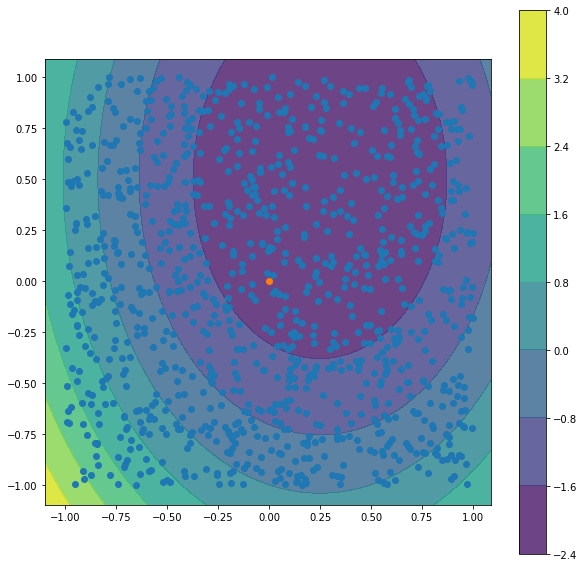

In [0]:
import random as rand 
import matplotlib.pyplot as plt

sigma = 0.2
def f(x1, x2):
  return 2*x1**2 + x2**2 - x1 -x2 - 2 

def avg(l): 
  return sum(l) / len(l)

NB_PTS = 1000

X1 = [ 2*rand.random()-1 for i in range(NB_PTS) ]
X2 = [ 2*rand.random()-1 for i in range(NB_PTS) ]

x01 = 0
x02 = 0

y0 = f(x01, x02) + rand.normalvariate (0, sigma)

X = list ( zip ( X1, X2) )

# we are trying to estimate the value of f at (0,0) as a mean of f at random surrounding points 
fig = plt.figure(figsize=(10,10))
ax = plt.axes() 

xx, yy = np.meshgrid(np.arange(-1.1, 1.1, 0.01),
                     np.arange(-1.1, 1.1, 0.01))

C = np.c_[(xx.ravel(), yy.ravel())]
Z =  np.array([f(*i) for i in C ])
Z = Z.reshape(xx.shape)

cf = ax.contourf(xx, yy, Z, alpha=0.8, origin='lower')

ax.set_aspect('equal')

ax.scatter(X1,X2)
ax.scatter([x01],[x02])
fig.colorbar(cf)
plt.show()



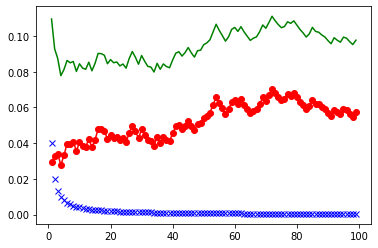

In [0]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# WRITE YOUR CODE HERE


